# Overfitting
## In this lab, we are going to explore how thoughtfully choosing a model and using test set are important parts of avoiding overfitting. 

We are going to apply these concepts to a classification model. We want to develop a decision boundary, on one side of which we have class A and on the other we have class B.

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever), and sucks only slightly less than overfitting. At least your model performs consistently bad :)


### First, we are going to generate some synthetic data. To make these concepts visual, we are going to generate this data to be concentric circles. Run the code below to do so. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

c:\Users\marci\.conda\envs\danalysis\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### As our classification algorithm, we are going to use a type of SVM with a radial basis function. This basically works by mapping each point into a higher dimensional space that can be split by the SVM (gross oversimplificaiton). That looks something like this:
![RBFSVM.png](RBFSVM.png)

### We can change thecomplexity of the decision boundaries applied by the SVM by changignt the size of the radial basis function, through the parameter 'gamma'.

Instantiate a list of three SVM classifiers with three different gamma parameters, (.001, 1, and 20).

In [2]:
# Your code here
classifiers=[]
for i in [0.001,1,20]:
    clf = SVC(gamma=i)
    classifiers.append(clf)

### Now, we are going to plot the boundaries created by each of these classifiers with the points we generated. Run the following code to make three graphs of each SVM classifier.

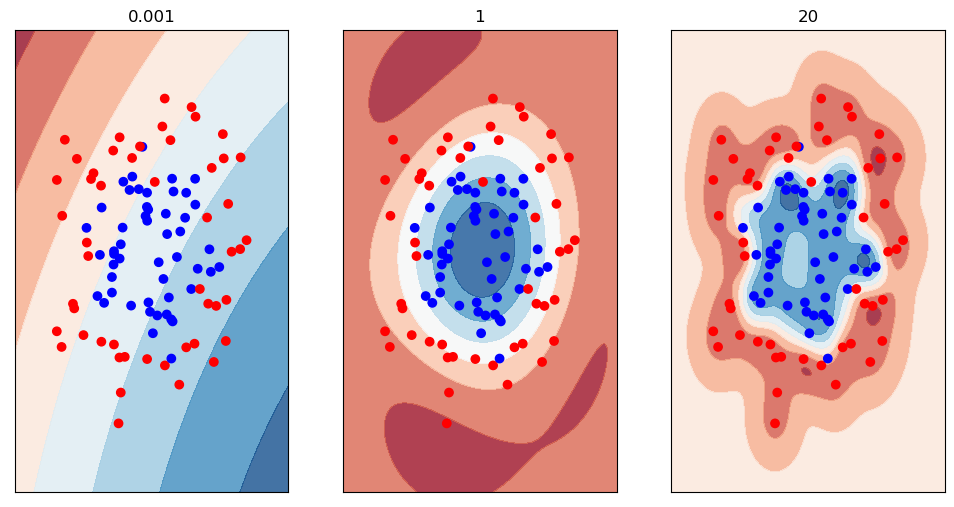

In [5]:
from matplotlib.colors import ListedColormap
names = [.001, 1, 20]
figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Where the contour is red, we will predict red, and same for blue; white means there is a 50/50 chance of either class
Explain what you see in the plots above.

Which gamma do you think fits the data best? 

What would you select as the opitmal gamma?

The code above shows the results of the SVC model with three different values for the parameter gamma. The goal is to classify two classes (red and blue). The results show a higher precision in the cluster boundaries from as the gamma value goes higher. However, the last figure show that there is a possibility of overfitting. 
The middle values (gamma =1) shows a compromise between high and lowest bias

### Without having used a training and testing set, lets see what our accuracy score would be for, for example, a gamma of .7. Use the .score() method.

In [6]:
# Your code here
clf = SVC(gamma=0.7)
clf.fit(X, y)


SVC(gamma=0.7)

In [9]:
y_predict = clf.predict(X)
clf.score(X,y)

0.93

### Wow thats good accuracy! But is it generalizable? Make a test/train split and see how the model performs on the SVM with the gamma of 20. 

In [10]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets using sklearn's train_test_split function.
    
    Parameters:
    X (pandas DataFrame): The feature matrix
    y (pandas Series): The target variable
    test_size (float): The proportion of data to include in the test set
    random_state (int): The random seed to use for reproducibility
    
    Returns:
    X_train (pandas DataFrame): The feature matrix for the training set
    X_test (pandas DataFrame): The feature matrix for the testing set
    y_train (pandas Series): The target variable for the training set
    y_test (pandas Series): The target variable for the testing set
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [11]:
# Your code here
X_train, X_test, y_train, y_test = split_data(X,y)

In [12]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8

### Try with some of the other gammas to see how the accuracy score changes after implementing a test/train split. 

In [15]:
# Your code here
classifiers=[]
for i in [0.001,1,20]:
    clf = SVC(gamma=i)
    clf_split = SVC(gamma=i)
    classifiers.append((clf,clf_split))
# iterate over classifiers
for name, classes in zip(names, classifiers):
    clf = classes[0]
    clf_split = classes[1]
    clf.fit(X, y)
    clf_split.fit(X_train,y_train)
    print(f"Score with gamma without split = {i} is {clf.score(X,y)}")
    print(f"Score with gamma with split = {i} is {clf_split.score(X_test,y_test)}")

Score with gamma without split = 20 is 0.61
Score with gamma with split = 20 is 0.35
Score with gamma without split = 20 is 0.92
Score with gamma with split = 20 is 0.8
Score with gamma without split = 20 is 0.96
Score with gamma with split = 20 is 0.85


### Was your previous model overfitting? If so, how would you try to improve this model to prevent this?

In [17]:
from sklearn.model_selection import GridSearchCV


In [18]:
# Your response here
param_grid = {
    'gamma': [0.001,0.1, 1,5,10,20]
    }
clf=SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)


In [19]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.001, 0.1, 1, 5, 10, 20]},
             return_train_score=True)

In [20]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'gamma': 1}

In [23]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002838,0.003136,0.001273,0.001598,0.001,{'gamma': 0.001},0.5625,0.5625,0.5625,0.5000,...,0.5375,0.030619,5,0.531250,0.531250,0.531250,0.546875,0.546875,0.537500,0.007655
1,0.003646,0.003658,0.000000,0.000000,0.1,{'gamma': 0.1},0.5625,0.5625,0.5625,0.5000,...,0.5375,0.030619,5,0.531250,0.531250,0.531250,0.546875,0.546875,0.537500,0.007655
2,0.001208,0.002416,0.001208,0.002416,1,{'gamma': 1},1.0000,0.9375,0.9375,0.8750,...,0.9125,0.063738,1,0.921875,0.921875,0.921875,0.953125,0.921875,0.928125,0.012500
3,0.004125,0.002547,0.000000,0.000000,5,{'gamma': 5},0.9375,1.0000,0.8125,0.8125,...,0.8875,0.072887,2,0.953125,0.921875,0.953125,0.953125,0.953125,0.946875,0.012500
4,0.001607,0.003213,0.003213,0.003935,10,{'gamma': 10},0.8750,1.0000,0.7500,0.8750,...,0.8625,0.082916,3,0.953125,0.968750,0.953125,0.968750,0.968750,0.962500,0.007655
5,0.003213,0.003935,0.000000,0.000000,20,{'gamma': 20},0.8750,1.0000,0.6875,0.8125,...,0.8375,0.101550,4,0.984375,0.968750,0.968750,0.984375,0.984375,0.978125,0.007655


In [21]:
clf_best=SVC(**best_params)
clf_best.fit(X_train,y_train)
print(f"Score with gamma with split  is {clf_best.score(X_test,y_test)}")

Score with gamma with split  is 0.8
